In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [20]:
def tomorrow_forecast(today_weather):
    if today_weather == 'cloudy':
        if stats.uniform.rvs() < 0.5:
            return 'clear'
        else:
            return 'cloudy'
    elif today_weather == 'clear':
        if stats.uniform.rvs() < 0.1:
            return 'cloudy'
        else:
            return 'clear'

In [21]:
# Just a test to see if the function works properly

run_test = False

if run_test:
    fig, ax = plt.subplots(1, 2, figsize=(16,9))

    #----------------------------------------------------------------

    today_weather = 'cloudy'

    clear_counter = 0
    cloudy_counter = 0

    for i in range(1000):
        if tomorrow_forecast(today_weather) == 'clear':
            clear_counter += 1
        else:
            cloudy_counter += 1

    ax[0].set_title("Forecast if today is " + today_weather.upper())
    ax[0].bar(['clear', 'cloudy'], [clear_counter, cloudy_counter])

    #----------------------------------------------------------------

    today_weather = 'clear'

    clear_counter = 0
    cloudy_counter = 0

    for i in range(1000):
        if tomorrow_forecast(today_weather) == 'clear':
            clear_counter += 1
        else:
            cloudy_counter += 1

    ax[1].set_title("Forecast if today is " + today_weather.upper())
    ax[1].bar(['clear', 'cloudy'], [clear_counter, cloudy_counter])

plt.show()

In [22]:
N = 10000

# Initialise the array of weather forecasts
# Contains the forecast for every day
# weather[0] is the starting day 
weather = ['cloudy']

# List of possible weathers and their indexes and colors
weather_list = ['clear', 'cloudy']
weather_colors = ['royalblue', 'orange']
weather_indexes = [0, 1]

# Total number of clear and cloudy days
# days_counter[j], j = 0, 1
#                                           0: clear_days
#                                           1: cloudy_days
days_counter = np.zeros(2)

# cumulative_forecast[j][number_of_days]
cumulative_forecast = np.zeros((2, N))

# For every day
for day in range(N):
    # Append the forcast based on the previous (current) day
    weather.append(tomorrow_forecast(weather[day]))

    for j in weather_indexes:
        # Update the days counter considering the appended forecast
        if weather[day+1] == weather_list[j]:
            days_counter[j] += 1

        # Update the comulative fraction of sunny and cloudy days up to the current day
        cumulative_forecast[j][day] = days_counter[j] / (day + 1)

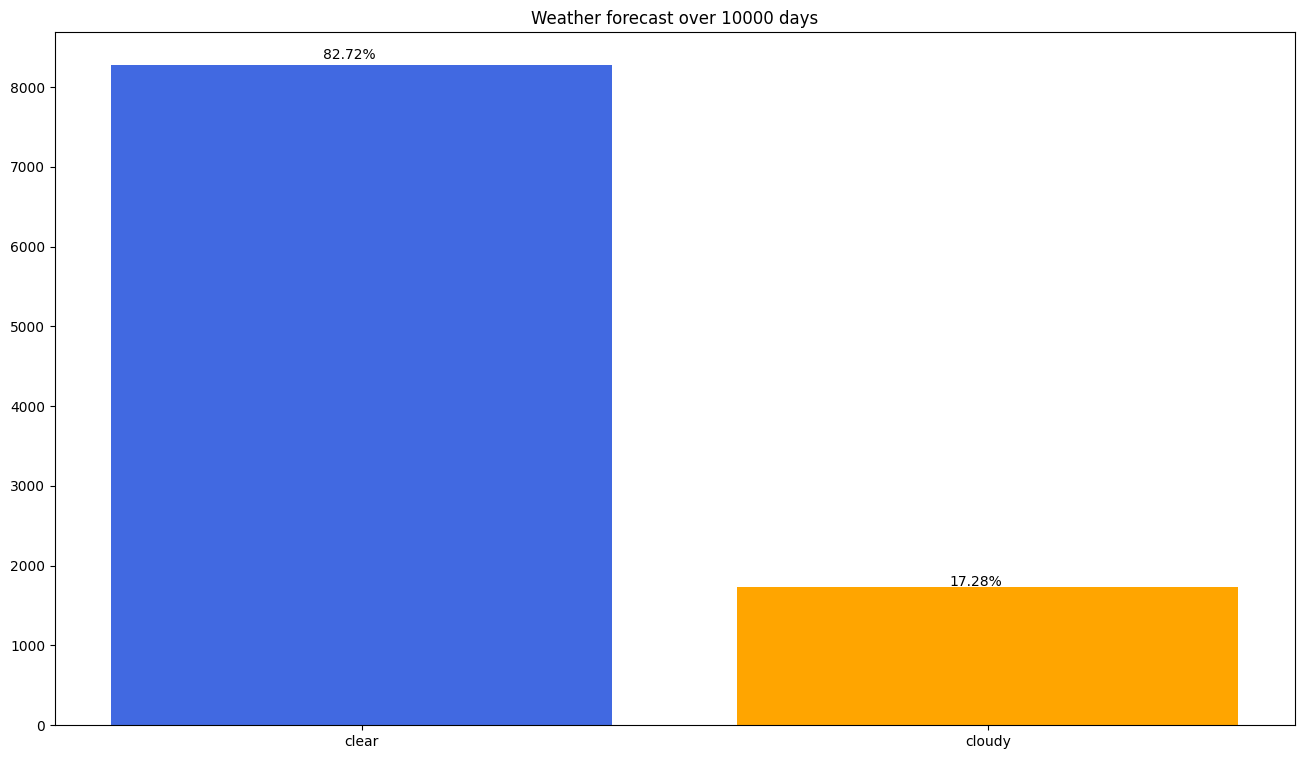

In [23]:
fig, ax = plt.subplots(figsize=(16,9))

ax.set_title("Weather forecast over " + str(N) + " days")
ax.bar(weather_list, days_counter, color=weather_colors)

for i in ax.patches:
    text = str(round((i.get_height() / N) * 100, 2)) + "%"
    plt.text(i.get_x() + i.get_width() / 2 * (1 - 2 / 13), i.get_height() * (1 + 0.01), text)

plt.show()

CLEAR
Expected value of mu = 0.8270218027992069
68% credible region = 0.8256409330428064 to 0.828260943586517

CLOUDY
Expected value of mu = 0.17297819720079308
68% credible region = 0.17173905641348297 to 0.17435906695719358



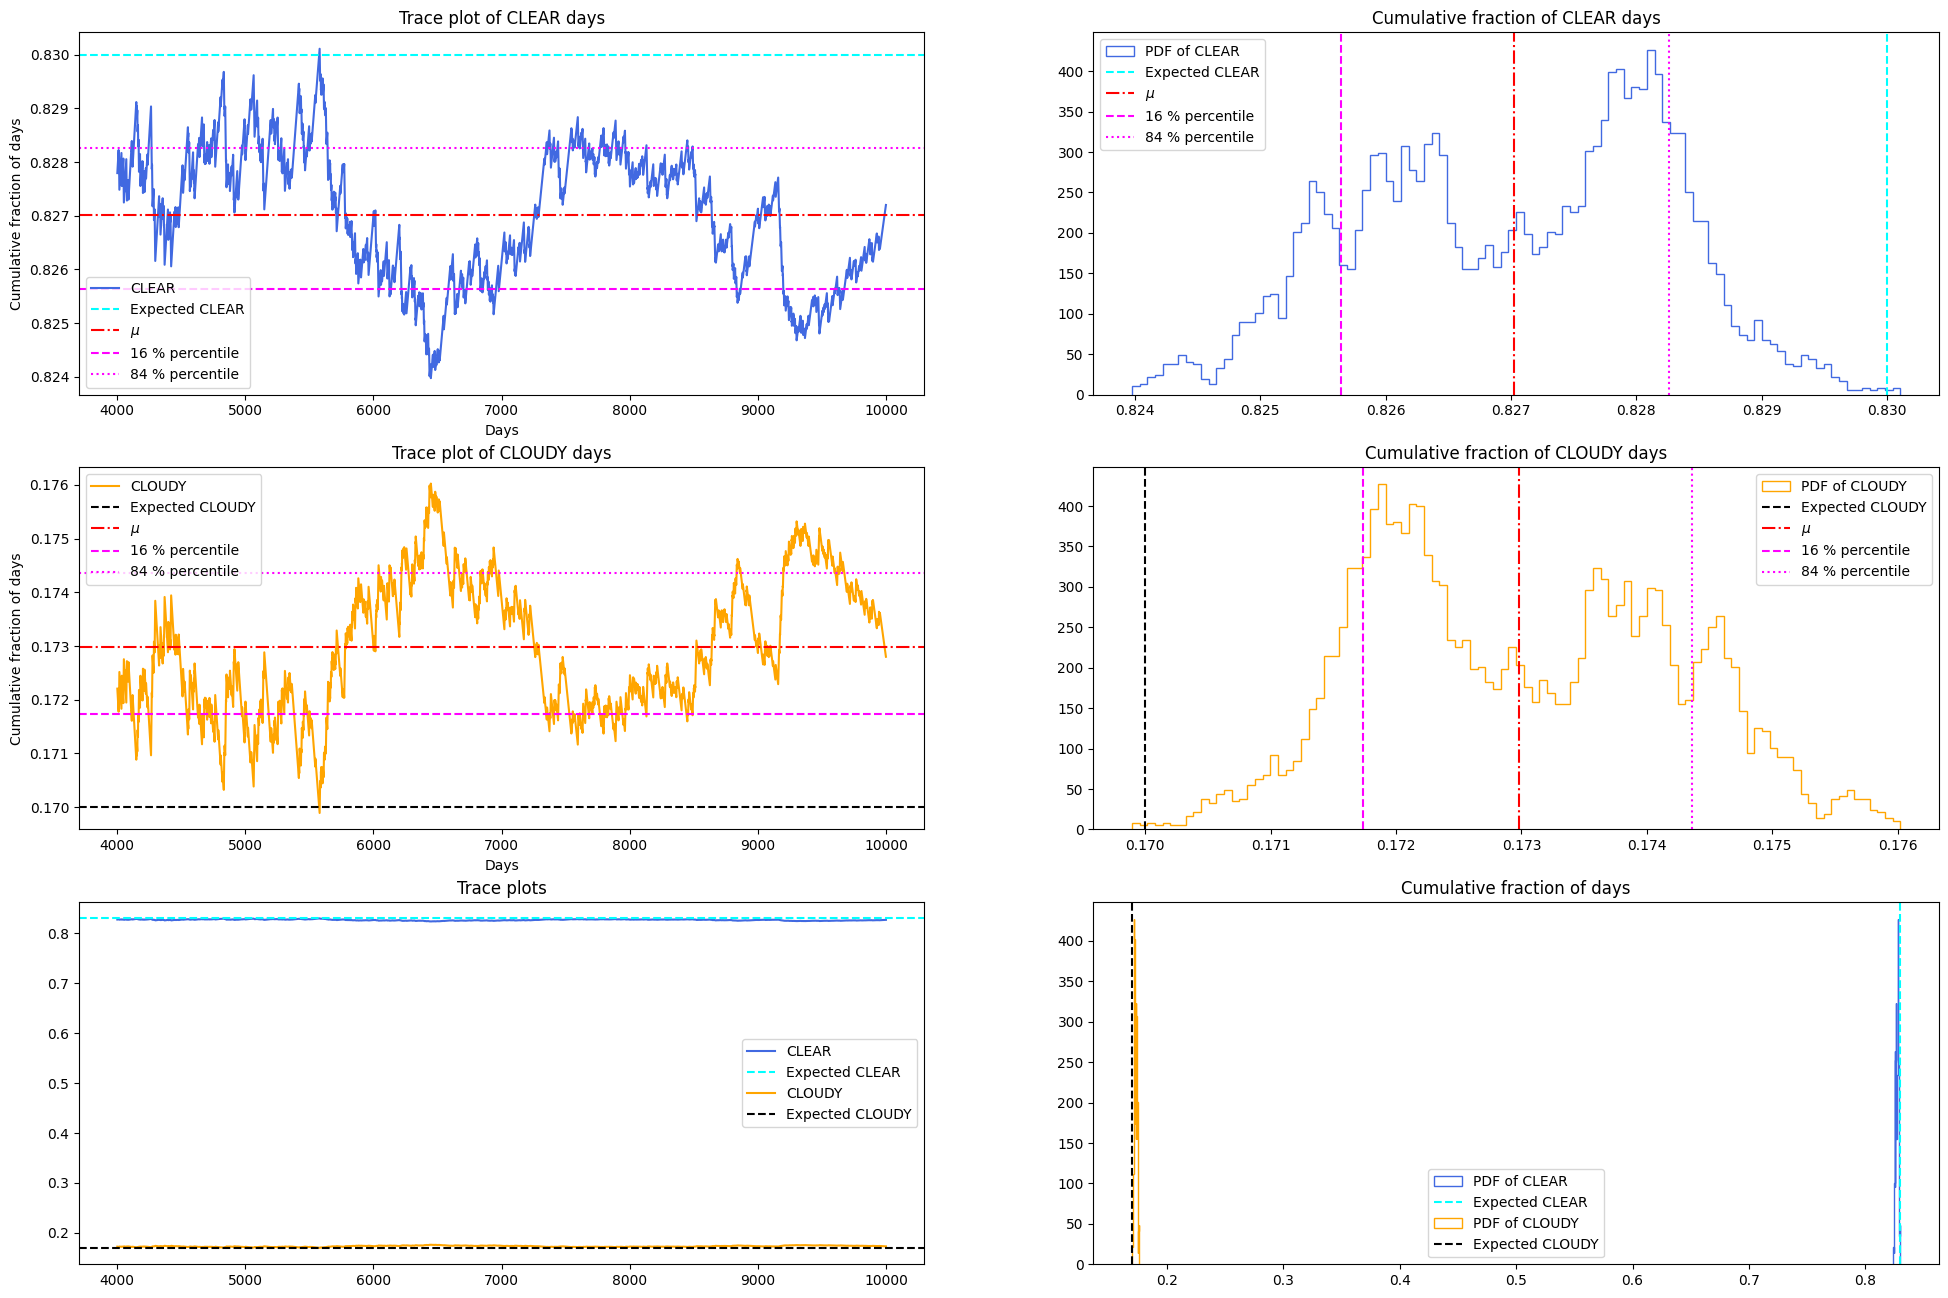

In [24]:
n_rows = len(weather_indexes) + 1
n_cols = 2

# Theoretical expectations and their colors
p_weather = np.array([0.83, 0.17])
p_weather_colors = ['aqua', 'black']

# Days from 1 to N
days_grid = np.array(range(1, N + 1))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(24,16))

# Index of days from which the plots start
# We want to discard initial indexes where we are dominated by the initial conditions
start_index = 4000

# estimators[weather_index][estimator]
# estimator: 0, 1, 2 (mu, lower, upper, MAP) where 'lower' and 'upper' are
# 68% equal-tailed credible region for mu, 'mu' is the mean from the PDF and
# 'MAP' is the maximum a posteriori
estimators = np.zeros((len(weather_indexes), 3))

q1, q2 = 16, 84

# Parameters for estimators plots
estimators_colors = ['red', 'magenta', 'magenta']
estimators_styles = ['-.', '--', ':']
# the 'r' in front of '$\mu$' is to avoid warnings
estimators_names = [r'$\mu$', str(q1) + ' % percentile', str(q2) + ' % percentile']

for i in weather_indexes:
    estimators[i][0] = np.mean(cumulative_forecast[i][start_index:])
    estimators[i][1] = np.percentile(cumulative_forecast[i][start_index:], q=q1)
    estimators[i][2] = np.percentile(cumulative_forecast[i][start_index:], q=q2)

    # Trace plots
    ax[i][0].set_title("Trace plot of " + weather_list[i].upper() + " days")
    ax[i][0].set_xlabel("Days")
    ax[i][0].set_ylabel("Cumulative fraction of days")

    ax[i][0].plot(days_grid[start_index:],
                  cumulative_forecast[i][start_index:],
                  color=weather_colors[i],
                  label=weather_list[i].upper())
    ax[i][0].axhline(p_weather[i],
                     color=p_weather_colors[i],
                     label="Expected "+weather_list[i].upper(),
                     ls='--')
    for j in range(3):
        ax[i][0].axhline(estimators[i][j],
                         color=estimators_colors[j],
                         label=estimators_names[j],
                         ls=estimators_styles[j])
    
    ax[n_rows-1][0].plot(days_grid[start_index:],
                         cumulative_forecast[i][start_index:],
                         color=weather_colors[i],
                         label=weather_list[i].upper())
    ax[n_rows-1][0].axhline(p_weather[i],
                            color=p_weather_colors[i],
                            label="Expected "+weather_list[i].upper(),
                            ls='--')
    
    ax[i][0].legend()

    # Histograms
    nbins = 100

    ax[i][1].set_title("Cumulative fraction of " + weather_list[i].upper() + " days")

    ax[i][1].hist(cumulative_forecast[i][start_index:],
                  nbins,
                  color=weather_colors[i],
                  density=True,
                  label="PDF of "+weather_list[i].upper(),
                  histtype='step')
    ax[i][1].axvline(p_weather[i],
                     color=p_weather_colors[i],
                     label="Expected "+weather_list[i].upper(),
                     ls='--')
    
    for j in range(3):
        ax[i][1].axvline(estimators[i][j],
                         color=estimators_colors[j],
                         label=estimators_names[j],
                         ls=estimators_styles[j])
    
    ax[n_rows-1][1].hist(cumulative_forecast[i][start_index:],
                         nbins,
                         color=weather_colors[i],
                         density=True,
                         label="PDF of "+weather_list[i].upper(),
                         histtype='step')
    ax[n_rows-1][1].axvline(p_weather[i],
                            color=p_weather_colors[i],
                            label="Expected "+weather_list[i].upper(),
                            ls='--')
    
    ax[i][1].legend()

    # Printing estimators
    print(weather_list[i].upper())
    print("Expected value of mu = " + str(estimators[i][0]))
    print("68% credible region = " + str(estimators[i][1]) + " to " + str(estimators[i][2]) + "\n")

ax[n_rows-1][0].set_title("Trace plots")
ax[n_rows-1][1].set_title("Cumulative fraction of days")

ax[n_rows-1][0].legend()
ax[n_rows-1][1].legend()

plt.show()